<h1>Рынок заведений общественного питания Москвы<h1>

1. **Заказчики** - Инвесторы из фонда «Shut Up and Take My Money», которые хотят открыть заведение общественного питания в Москве

2. **Цель:** Проанализировать полученные данные и на основе их подготовить рекомендации 

3. **Задача:** 
    - Подготовить исследование рынка Москвы
    - Найти интересные особенности
    - Презентовать полученные результаты
4. Для исследования данных предоставлен датасет с заведениями общественного питания Москвы, составленный на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года.Информация, размещённая в сервисе Яндекс Бизнес, могла быть добавлена пользователями или найдена в общедоступных источниках. Она носит исключительно справочный характер.

5. **Описание данных:**

- Файл **moscow_places.csv:**
- **name** — название заведения;
- **address** — адрес заведения;
- **category** — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- **hours** — информация о днях и часах работы;
- **lat** — широта географической точки, в которой находится заведение;
- **lng** — долгота географической точки, в которой находится заведение;
- **rating** — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- **price** — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- **avg_bill** — строка, которая хранит среднюю стоимость заказа в виде диапазона, например: 
- «Средний счёт: 1000–1500 ₽»;
- «Цена чашки капучино: 130–220 ₽»;
- «Цена бокала пива: 400–600 ₽».и так далее;
- **middle_avg_bill** — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»: 
- Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
- Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
- Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- **middle_coffee_cup** — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»: 
- Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
- Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
- Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.
- **chain** — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
- **0** — заведение не является сетевым
- **1** — заведение является сетевым
- **district** — административный район, в котором находится заведение, например Центральный административный округ;
- **seats** — количество посадочных мест.

1. [Загрузка данных](#start)
2. [Предобработка данных](#preprocessing)
    * [Обработка пропущенных значений](#null)
    * [Обработка дубликатов](#duplicates)
    * [Создание новых столбцов](#column)
3. [Анализ данных](#analysis)
    * [Исследование количества объектов по категориям](#object)
    * [Исследование количества посадочных мест](#seat)
    * [Соотношение сетевых и несетевых заведений](#establishment)
    * [Рассмотрение сетевых заведений](#establishment1)
    * [Вывод 15-ти популярных сетей в Москве](#top15)
    * [Вывод общего количества заведений каждой категории по районам](#totalcat)
    * [Визуализация распределения средних рейтингов по категориям заведений](#meancat)
    * [Построение хороплета со средним рейтингом заведений каждого района](#horop)
    * [Отображение заведений с помощью кластеров](#claster)
    * [Вывод топ 15-ти улиц по колличеству заведений и построение графика](#top15total)
    * [Поиск улиц, на которых находится только один объект общепита](#street)
    * [Построение хороплета по медиане столбца middle_avg_bill](#horop1)
4. [Детализируем исследование: открытие кофейни](#coffee)
    * [Сколько всего кофеен в датасете?](#totalcof)
    * [Есть ли круглосуточные кофейни?](#totaltime)
    * [Какие у кофеен рейтинги?](#coffeerat)
    * [На какую стоимость чашки капучино стоит ориентироваться при открытии?](#cap)
    * [Ответ на вопрос/рекомендация](#answer)
5. [Презентация](#pres)

**1.Загрузим данные и изучим их**<a id="start"></a> 

In [22]:
#Добавляем библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import plotly as py
from plotly import graph_objects as go
from folium import Map, Choropleth, Marker
from folium.plugins import MarkerCluster
import json

In [23]:
#Загрузим датасет
data = pd.read_csv('/datasets/moscow_places.csv')
display(data)
data.info()

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN
1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0
2,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45.0
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN
4,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,1,148.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8401,Суши Мания,кафе,"Москва, Профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",55.670021,37.552480,4.4,NaN,NaN,NaN,NaN,0,86.0
8402,Миславнес,кафе,"Москва, Пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",55.640875,37.656553,4.8,NaN,NaN,NaN,NaN,0,150.0
8403,Самовар,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",55.648859,37.743219,3.9,NaN,Средний счёт:от 150 ₽,150.0,NaN,0,150.0
8404,Чайхана Sabr,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",55.648849,37.743222,4.2,NaN,NaN,NaN,NaN,1,150.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


**Вывод:**
- Всего данных в столбце 8406
- Типы данных расставлены правильно
- Имеются пропуски

**2. Предобработка данных**<a id="preprocessing"></a> 

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


**2.1 Изучим пропуски:**<a id="null"></a> 
- hours - 536 пропусков
- price - 5091 пропуск
- avg_bill - 4590 пропуск
- middle_avg_bill - 5257 пропуск
- middle_coffee_cup - 7871 пропуск
- seats - 3611 пропуск

*avg_bill, middle_avg_bill, middle_coffee_cup - взаимосвязанные столбцы, поэтому пропуски здесь также взаимосвязаны*

**Вывод:** Большинство пропусков скорее всего связано с тем, что данные предприятия открылись совсем недавно и полных данных о их деятельности еще нет

**2.2 Проверим на дубликаты:**<a id="duplicates"></a> 

In [25]:
#Выводим сумму дубликатов
data.duplicated().sum()

0

**Вывод:** Полных дубликатов не выявлено

In [26]:
#Проверим наличие дубликатов в адресах
print('Количество дубликатов в адресах -',data['address'].duplicated().sum())

Количество дубликатов в адресах - 2653


In [27]:
#Проверим наличие дубликатов в названиях
print('Количество дубликатов в названиях -',data['name'].duplicated().sum())

Количество дубликатов в названиях - 2792


**Вывод:** Вывод тут простой, на одном адресе может находиться сразу несколько заведений. А дубликаты в названиях нам говорят о том, что в данных присутствуют сети заведений

In [28]:
#Проверим оба столбца сразу и выведем уникальное значение, чтобы понять, есть ли дубликаты
sdf = data.duplicated(['address', 'name']).unique()
sdf

array([False])

**Вывод:** Дубликатов не обнаружилось

**2.3 Создадим новые столбцы**<a id="column"></a> 

In [29]:
#Создаем функцию для извлечения улицы и создаем новый столбец "street"
def street(row):
    address = row['address'].split(', ')
    street = address[1]
    return street
data['street'] = data.apply(street, axis=1)
data.sample(10)

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street
1404,Хинкальная,ресторан,"Москва, Хорошёвское шоссе, 27",Северный административный округ,"ежедневно, 11:00–23:00",55.777576,37.523218,4.4,средние,Средний счёт:800–1000 ₽,900.0,NaN,1,45.0,Хорошёвское шоссе
229,Свои люди,ресторан,"Москва, Белозерская улица, 17Г",Северо-Восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–02:00; вс 12:00...",55.895952,37.619865,4.4,средние,Средний счёт:от 700 ₽,700.0,NaN,0,98.0,Белозерская улица
4814,Гамбринус,"бар,паб","Москва, Марксистская улица, 20",Центральный административный округ,"пн-пт 11:00–00:00; сб,вс 12:00–00:00",55.738579,37.659655,4.5,выше среднего,Средний счёт:1000–1500 ₽,1250.0,NaN,1,NaN,Марксистская улица
8132,Family Club,"бар,паб","Москва, проспект Андропова, 1",Южный административный округ,"ежедневно, 10:00–23:00",55.694126,37.675283,4.0,NaN,NaN,NaN,NaN,0,250.0,проспект Андропова
7669,Нияма,ресторан,"Москва, Кировоградская улица, 13А",Южный административный округ,"ежедневно, 10:00–23:00",55.612155,37.605307,4.4,средние,NaN,NaN,NaN,1,250.0,Кировоградская улица
1430,More poke,ресторан,"Москва, Волоколамское шоссе, 11, стр. 2",Северный административный округ,"ежедневно, 09:00–21:00",55.806307,37.497566,4.2,NaN,NaN,NaN,NaN,0,188.0,Волоколамское шоссе
5936,АндерСон,кафе,"Москва, улица Серпуховский Вал, 21к4",Южный административный округ,"ежедневно, 10:00–22:00",55.711323,37.607872,4.6,средние,Средний счёт:550–1550 ₽,1050.0,NaN,1,NaN,улица Серпуховский Вал
3714,Scrocchiarella,пиццерия,"Москва, Никитский бульвар, 12",Центральный административный округ,"ежедневно, 10:00–22:00",55.755096,37.600707,4.5,выше среднего,Средний счёт:1000–1500 ₽,1250.0,NaN,1,50.0,Никитский бульвар
1163,Кофейня,кофейня,"Москва, проспект Мира, 119с71",Северо-Восточный административный округ,NaN,55.830040,37.633969,4.4,NaN,NaN,NaN,NaN,0,NaN,проспект Мира
8201,Бриошь,кафе,"Москва, Подольское шоссе, 8, подъезд 2",Южный административный округ,пн-пт 12:00–17:00,55.714965,37.624848,4.1,NaN,NaN,NaN,NaN,0,NaN,Подольское шоссе


In [30]:
#Создадим столбец is_24/7 с обозначением, что заведение работает ежедневно и круглосуточно
data['is_24/7'] = data['hours'].str.contains('ежедневно, круглосуточно')
data.head(50)

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street,is_24/7
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN,улица Дыбенко,False
1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0,улица Дыбенко,False
2,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45.0,Клязьминская улица,False
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN,улица Маршала Федоренко,False
4,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,1,148.0,Правобережная улица,False
5,Sergio Pizza,пиццерия,"Москва, Ижорская улица, вл8Б",Северный административный округ,"ежедневно, 10:00–23:00",55.888010,37.509573,4.6,средние,NaN,NaN,NaN,0,NaN,Ижорская улица,False
6,Огни города,"бар,паб","Москва, Клязьминская улица, 9, стр. 3",Северный административный округ,пн 15:00–04:00; вт-вс 15:00–05:00,55.890752,37.524653,4.4,средние,Средний счёт:199 ₽,199.0,NaN,0,45.0,Клязьминская улица,False
7,Mr. Уголёк,быстрое питание,"Москва, Клязьминская улица, 9, стр. 3",Северный административный округ,"пн-чт 10:00–22:00; пт,сб 10:00–23:00; вс 10:00...",55.890636,37.524303,4.7,средние,Средний счёт:200–300 ₽,250.0,NaN,0,45.0,Клязьминская улица,False
8,Donna Maria,ресторан,"Москва, Дмитровское шоссе, 107, корп. 4",Северный административный округ,"ежедневно, 10:00–22:00",55.880045,37.539006,4.8,средние,Средний счёт:от 500 ₽,500.0,NaN,0,79.0,Дмитровское шоссе,False
9,Готика,кафе,"Москва, Ангарская улица, 39",Северный административный округ,"ежедневно, 12:00–00:00",55.879038,37.524487,4.3,средние,Средний счёт:1000–1200 ₽,1100.0,NaN,0,65.0,Ангарская улица,False


**Вывод:**
- Были обнаружены пропуски, но с ними ничего нельзя поделать, т.к. это может повлиять на дальнейший анлиз
- Полных дубликатов не было обнаружено
- Были созданы два столбца: для извлечения улицы и для обозначения режима работы

**3.Анализ данных**<a id="analysis"></a> 

**3.1 Исследуем количество объектов общественного питания по категориям**<a id="object"></a> 

In [31]:
#Выводим уникальные значения
data['category'].unique()

array(['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб',
       'быстрое питание', 'булочная', 'столовая'], dtype=object)

**Вывод:** Всего 8 видов объектов: кафе, ресторан, кофейня, пиццерия, бар,паб, быстрое питание, булочная и столовая.

**Построим столбчатую диаграмму**

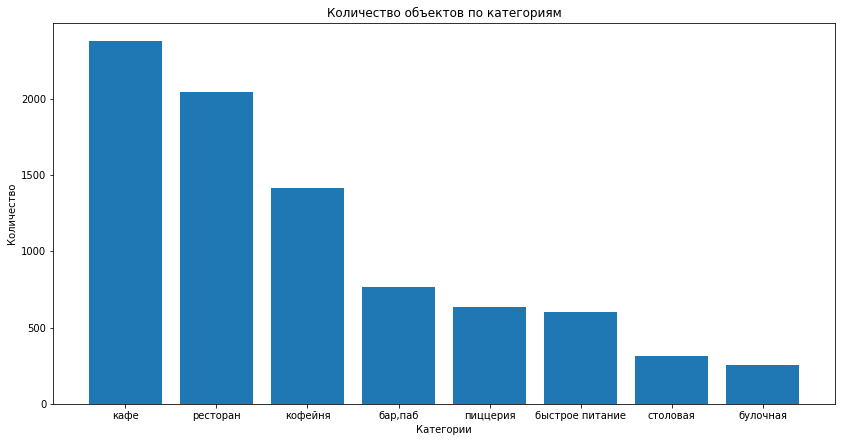

In [32]:
#Создаем сводную таблицу, сортируем ее
count_category = data.pivot_table(index=['category'], values='address', aggfunc='count').sort_values(by = 'address', ascending=False)
count_category.columns= ['values']
name_category = count_category.index
values = count_category['values']

plt.figure(figsize=(14, 7))
plt.bar(name_category, values)
plt.title('Количество объектов по категориям')
plt.xlabel('Категории')
plt.ylabel('Количество')
plt.show()

**Вывод:**
- 1 место занимают кафе - 28.3%(2378)
- 2 место занимают рестораны - 24.3%(2043)
- 3 место занимают кофейни - 16.8%(1413)

**3.2 Исследуем количество посадочных мест**<a id="seat"></a> 

In [33]:
#Выведем среднее и медианное значение
data.pivot_table(index='category', values='seats', aggfunc=['mean', 'median'])

,mean,median
,seats,seats
category,,
"бар,паб",124.532051,82.5
булочная,89.385135,50.0
быстрое питание,98.891117,65.0
кафе,97.512315,60.0
кофейня,111.199734,80.0
пиццерия,94.496487,55.0
ресторан,121.944094,86.0
столовая,99.750000,75.5


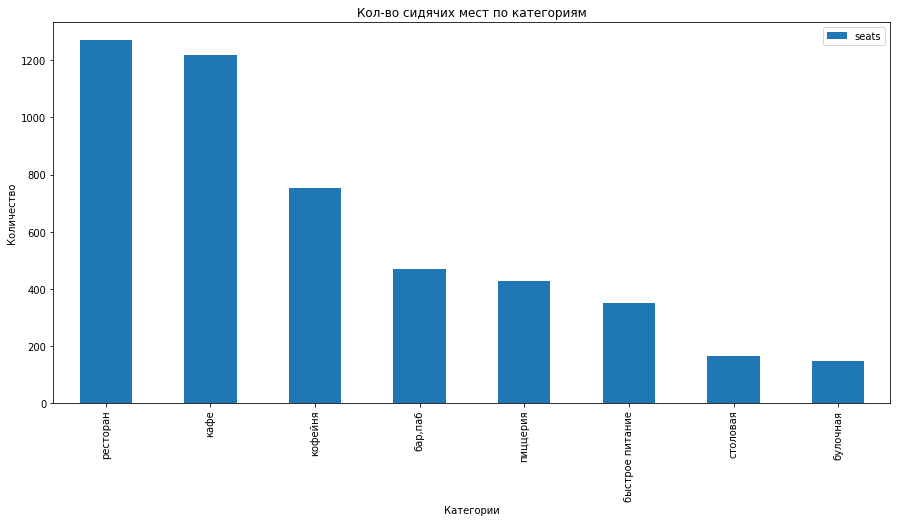

In [34]:
#Выведем количество сидячих мест по категориям
(
    data.pivot_table(index='category', values='seats', aggfunc='count')
    .sort_values(by='seats',ascending=False)
    .plot(title = 'Кол-во сидячих мест по категориям', kind = 'bar', grid = False, figsize=(15,7))
)
plt.xlabel('Категории')
plt.ylabel('Количество')
plt.show()

**Вывод:** Больше всего сидячих мест в ресторанах и кафе

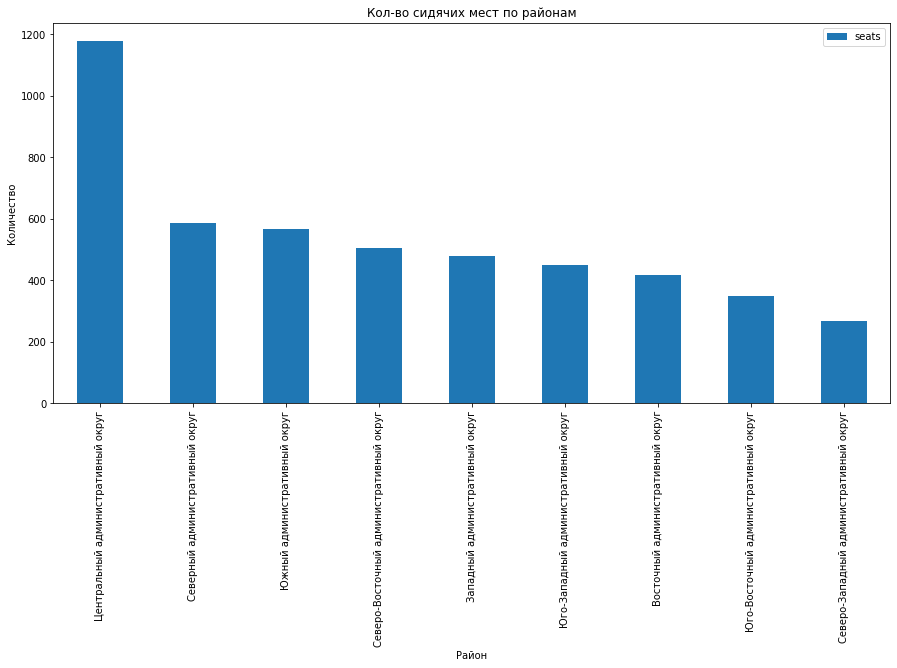

In [35]:
#Рассмотрим более подробно зависимости
#Зависимоть количества посадочных мест от района
(
    data.pivot_table(index='district', values='seats', aggfunc='count')
    .sort_values(by='seats',ascending=False)
    .plot(title = 'Кол-во сидячих мест по районам', kind = 'bar', grid = False, figsize=(15,7))
)
plt.xlabel('Район')
plt.ylabel('Количество')
plt.show()

*В ЦАО больше всего посадочных мест*

**Вывод:**

- Больше всего посадочных мест в Ресторанах и Кафе
- Меньше всего посадочных мест в Столовой и Булочной
- Наибольшее количество посадочных мест в ЦАО
- Наименьшее количество посадочных мест в СЗАО

**3.3 Рассмотрим и изобразим соотношение сетевых и несетевых заведений**<a id="establishment"></a> 

In [36]:
#Создаем сводную таблицу, сортируем ее
count_chain = data.pivot_table(index=['chain'], values='address', aggfunc='count').sort_values(by = 'address', ascending=False)
count_chain.columns= ['values']
name_chain = count_chain.index
values = count_chain['values']
#Выводим круговую диаграмму
fig = go.Figure(data=[go.Pie(labels=name_chain, values=values)])
fig.update_layout(title='Соотношение сетевых и несетевых заведений')          
fig.show() 

**Вывод:**
*Сетевых заведений меньше, чем несетевых*

- Сетевых 3205(38.1%)
- Несетевых 5201(61.9%)

**3.4 Рассмотрим какие категории заведений чаще являются сетевыми**<a id="establishment1"></a> 

In [37]:
chain_establishments = data[data['chain'] == 1]
asd = chain_establishments.pivot_table(index='category', values='name', aggfunc='count').sort_values(by='name',ascending= False)
fig = px.bar(asd, title='Категории, которые чаще являются сетевыми')
fig.show()

**Вывод:**
*Чаще всего сетевыми заведениями являются:*
- Кафе
- Ресторан
- Кофейни

In [45]:
#Создадим переменную со свободной таблицой
catch = data.pivot_table(index='category', values='chain', aggfunc='count').sort_values(by='chain', ascending=False).head(15)
catchs = catch.index

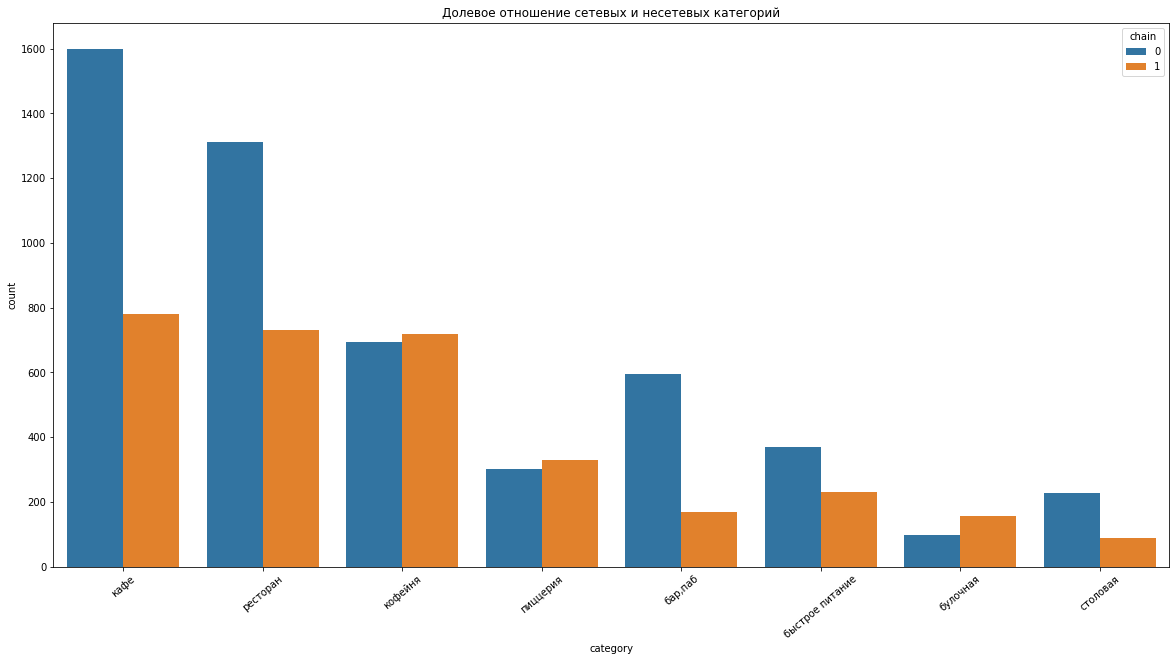

In [46]:
#Выводим диаграмму долевого соотношения сетевых и несетевых категорий
catch = data.query('category in @top_15')
plt.figure(figsize=(20, 10))
sns.countplot(x='category', hue='chain', data=top_15_str)
plt.xticks(rotation=40)
plt.title('Долевое отношение сетевых и несетевых категорий')
plt.show()

**Вывод:**

- *Доля сетевых заведений по категориям: "кафе", "ресторан", "бар, паб", "быстрое питание", "столовая" превышает долю несетевых заведений*;
- *Доля несетевых заведений по категориям: "кофейня", "пиццерия", "булочная" не намного превышает значение доли сетевых заведений*

**3.5 Сгруппируем данные по названиям заведений и найдем топ-15 популярных сетей в Москве**<a id="top15"></a> 

In [ ]:
top15 = data.query('chain == 1').groupby(['name', 'category'])['name'].count().sort_values(ascending = False).to_frame().head(15)
top15.columns = ['count']
top15 = top15.reset_index(level=0).reset_index(level=0).sort_values(by='count', ascending = False)
top15

In [ ]:
sns.jointplot(x='category', y='name', data = top15)
#plt.title('Популярные сетевые заведения')

In [ ]:
asd = top15.pivot_table(index='category', values='name', aggfunc='count').sort_values(by='name',ascending=False)
fig = px.bar(asd, title='Популярные сетевые заведения')
fig.show()

**Вывод:** Если внимательно посмотреть на этот график, то можно заметить, что самыми популярными сетевыми заведениями являются кофейни(Шоколадница, OPC, Cofix, Кофепорт, CF и Кофемания. Далее располагаются категории "ресторан" и "кафе"

**3.6 Отобразим общее количество заведений и количество заведений каждой категории по районам**<a id="totalcat"></a> 

In [ ]:
#Выведем уникальные названия административных районов
data['district'].unique()

In [ ]:
df = data.pivot_table(index='district', columns='category', values='address', aggfunc='count')
plt.figure(figsize=(14,9))
plt.title('Распределение категорий по административным районам')
sns.heatmap(df,annot=True)

In [ ]:
#Для наглядности по округам добавим столбчатую диаграмму
asd = data.pivot_table(index='district', values='category', aggfunc='count').sort_values(by='category',ascending=False)
fig = px.bar(asd, title='Распределение категорий по административным районам')
fig.show()

**Вывод:**

В ЦАО расположилось больше всего категорий, преобладающее большинство которых - "ресторан". Меньше всего категорий же расположились в СЗАО, где преобладающее большинство - "кафе"
- "бар, паб" - можно заметить, что большинство заведений расположено в ЦАО
- "кафе" - в диапазоне 200-300 во всех районах и за 500 в ЦАО
- Почти похожую картину составляют категории "кофейня" и "ресторан"

**3.7 Визуализируем распределение средних рейтингов по категориям заведений**<a id="meancat"></a> 

In [ ]:
#Выведем средние рейтинги по категориям
rts = data.groupby('category')['rating'].mean().sort_values(ascending=False).reset_index()
rts

In [ ]:
#Строим столбчатую диаграмму
fig = px.bar(rts, x='category', y='rating', title='Распределение средних рейтингов по категориям заведений')

fig.show()

**Вывод:**

Рейтинги почти идентичны: 4+, за исключением того, что у категории "быстрое питание" рейтинг наименьший, а у "бар, паб" наивысший

**3.8 Построим фоновую картограмму (хороплет) со средним рейтингом заведений каждого района**<a id="horop"></a> 

In [ ]:
#создаем датасет с медианными значениями рейтинга для каждого района
rating_df = data.groupby('district', as_index=False)['rating'].agg('median')
rating_df

In [ ]:
# читаем файл и сохраняем в переменной
with open('/datasets/admin_level_geomap.geojson', 'r') as f:
    geo_json = json.load(f)

print(json.dumps(geo_json, indent=2, ensure_ascii=False, sort_keys=True))

In [ ]:
# загружаем JSON-файл с границами округов Москвы
state_geo = '/datasets/admin_level_geomap.geojson'
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=rating_df,
    columns=['district', 'rating'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Медианный рейтинг заведений по районам',
).add_to(m)

# выводим карту
m

**Вывод:** *Рейтинги по районам:*
- Самые высокие рейтинги в ЦАО
- Самые низкие рейтинги в СВАО и ЮВАО

**3.9 Отобразим все заведения датасета на карте с помощью кластеров**<a id="claster"></a> 

In [ ]:
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)
# создаём пустой кластер, добавляем его на карту
marker_cluster = MarkerCluster().add_to(m)

# пишем функцию, которая принимает строку датафрейма,
# создаёт маркер в текущей точке и добавляет его в кластер marker_cluster
def create_clusters(row):
    Marker(
        [row['lat'], row['lng']],
        popup=f"{row['name']} {row['rating']}",
    ).add_to(marker_cluster)

# применяем функцию create_clusters() к каждой строке датафрейма
data.apply(create_clusters, axis=1)

# выводим карту
m

**3.10 Найдем топ-15 улиц по количеству заведений и построим график распределения количества заведений и их категорий по этим улицам**<a id="top15total"></a> 

In [ ]:
#Создаем сводную таблицу и сортируем ее
top_15_str = data.pivot_table(index='street', values='name', aggfunc='count').sort_values(by='name', ascending=False).head(15)
top_15_str

In [ ]:
#Оставим индексы
top_15 = top_15_str.index

In [ ]:
#Выводим диаграмму
top_15_str = data.query('street in @top_15')
plt.figure(figsize=(20, 10))
sns.countplot(x='street', hue='category', data=top_15_str)
plt.xticks(rotation=40)
plt.show()

In [ ]:
#Выведем цельные столбцы
asd = top_15_str.pivot_table(index='street', values='category', aggfunc='count').sort_values(by='category', ascending=False)
fig = px.bar(asd, title='Распределение категорий по административным районам')
fig.show()

**Вывод:**

*В общем и целом можно выделить "проспект Мира" как лидера. Также можем проанализировать категории по отдельности:  (Б-больше всего, М-меньше всего)*
- "Ресторан" - Б: Проспект Мира, М: МКАД
- "Кафе" - Б: Проспект Мира, М: Пятницкая улица
- "Пиццерия" - Б: Профсоюзная улица, М: МКАД(отсутствуют)
- "Столовая" - Б: Варшавское шоссе, М: Пятницка улица, улица Вавилова, улица Миклухо-Маклая(отсутствуют)
- "Кофейня" - Б: Проспект Мира, М: МКАД
- "Быстрое питание" - Б: Проспект Мира, М: Ленинградский, Кутозовский, Ленинский пп., Пятницкая улица
- "Бар, паб" - Б: Ленинградский проспект, М: МКАД
- "Булочная" - Б: Проспект Мира, М: МКАД, Люблинская улица, улица Миклухо-Маклая, Варшавское шоссе, Каширское шоссе(отсутствуют)


**3.11 Найдем улицы, на которых находится только один объект общепита**<a id="street"></a> 

In [ ]:
#Создадим сводную таблицу и отсортируем ее
one_place = data.pivot_table(index=['street'], values='name', aggfunc='count').sort_values(by='name')
one_place.columns = ['count']
one_place = one_place[one_place['count'] == 1]
print('Всего улиц с одним объектом -',one_place.shape[0])

In [ ]:
#Посмотрим на улицы
one_place_i = one_place.index
one_place_i

**Вывод:**

*Об этих улицах можно сказать то, что это прекрасный вариант для открытия новых заведений, т.к. конкуренции практически нет. Также есть предположение, что 1 улица может находиться сразу в 2 районах*

**3.12 Посчитаем медиану столбца "middle_avg_bill" для каждого района. Используем это значение в качестве ценового индикатора района. Построим фоновую картограмму (хороплет) с полученными значениями для каждого района**<a id="horop1"></a> 

In [ ]:
#Считаем медианные значения столбца middle_avg_bill
middle_df = data.groupby('district', as_index=False)['middle_avg_bill'].agg('median')
middle_df

In [ ]:
# загружаем JSON-файл с границами округов Москвы
state_geo = '/datasets/admin_level_geomap.geojson'
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=middle_df,
    columns=['district', 'middle_avg_bill'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Медианное значение ценового индикатора района',
).add_to(m)

# выводим карту
m

**Вывод:**

*Медианные значения ценового индикатора в ЦАО совпадают со значениями в ЗАО. Скорее всего это связано с тем, что в ЗАО проживают более зажиточная часть населения Москвы. Однако с отдаленностью в другие районы это значение падает*

**Промежуточный вывод:**
1. **Загрузили данные о заведениях общественного питания Москвы:**
- Изучили общую информацию о датасете
2. **Провели предобработка данных:**
- Полных дубликатов не обнаружилось
- Были обнаружены пропуски в данных, но изменению они не подлежали
- Были созданы новые столбцы с названиями улиц и режимом работы
3. **Провели анализ данных:**
- Всего 8 видов объектов: кафе, ресторан, кофейня, пиццерия, бар,паб, быстрое питание, булочная и столовая
- 1 место занимают кафе - 28.3%(2378), 2 место занимают рестораны - 24.3%(2043), 3 место занимают кофейни - 16.8%(1413)
- Больше всего посадочных мест в Ресторанах и Кафе, меньше всего посадочных мест в Столовой и Булочной
- Наибольшее количество посадочных мест в ЦАО, наименьшее количество посадочных мест в СЗАО
- Сетевых заведений меньше, чем несетевых (Сетевых 3205(38.1%), Несетевых 5201(61.9%))
- Чаще всего сетевыми заведениями являются: Кафе, Ресторан, Кофейни
- Самыми популярными сетевыми заведениями являются кофейни(Шоколадница, OPC, Cofix, Кофепорт, CF и Кофемания. Далее располагаются категории "ресторан" и "кафе". Самые непопулярные - Булочные
- В ЦАО расположилось больше всего категорий, преобладающее большинство которых - "ресторан". Меньше всего категорий же расположились в СЗАО, где преобладающее большинство - "кафе". 
- Большинство категории "бар, паб" расположились в ЦАО
- Катигория "кафе" - в диапазоне 200-300 во всех районах и за 500 в ЦАО. Почти похожую картину составляют категории "кофейня" и "ресторан"
- Рейтинги почти идентичны: 4+, за исключением того, что у категории "быстрое питание" рейтинг наименьший, а у "бар, паб" наивысший
- Рейтинги по районам: Самые высокие рейтинги в ЦАО, самые низкие рейтинги в СВАО и ЮВАО
- Об улицах, на которых 1 заведение можно сказать то, что это прекрасный вариант для открытия новых заведений, т.к. конкуренции практически нет. Также есть предположение, что 1 улица может находиться сразу в 2 районах
- Медианные значения ценового индикатора в ЦАО совпадают со значениями в ЗАО. Скорее всего это связано с тем, что в ЗАО проживают более зажиточная часть населения Москвы. Однако с отдаленностью в другие районы это значение падает

**4. Детализируем исследование: открытие кофейни**<a id="coffee"></a> 

**4.1 Сколько всего кофеен в датасете? В каких районах их больше всего, каковы особенности их расположения?**<a id="totalcof"></a> 

In [ ]:
#Подсчитаем количество кофеен
coffee = (data[data['category'] == 'кофейня']).sort_values(by='district',ascending=False)
print('Всего кофеен в датасете -',coffee.shape[0])

In [ ]:
#Посмотрим в каких районах их больше
asd = coffee.pivot_table(index='district', values='category', aggfunc='count').sort_values(by='category', ascending=False)
fig = px.bar(asd, title='Количество кофеен в районе')
fig.show()

**Вывод:**

*В ЦАО больше всего кофеен, дальше расположились САО,СВАО и ЗАО*

**4.2 Есть ли круглосуточные кофейни?**<a id="totaltime"></a> 


In [ ]:
print('Всего круглосуточных кофеен -', coffee['is_24/7'].sum())

In [ ]:
#Посмотрим на карте
rating_df = coffee.groupby('district', as_index=False)['is_24/7'].agg('sum')
    
# загружаем JSON-файл с границами округов Москвы
state_geo = '/datasets/admin_level_geomap.geojson'
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423
    
# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)
    
# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=rating_df,
    columns=['district', 'is_24/7'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Колличество круглосуточных кофеен',
).add_to(m)

# выводим карту
m

**Вывод:**

*Большинство круглосуточных кофеен в ЦАО, от 5 до 9 круглосуточных кофеен в ЗАО и ЮЗАО. Другие районы, к сожалению, таким похвастаться не могут*

**4.3 Какие у кофеен рейтинги? Как они распределяются по районам?**<a id="coffeerat"></a> 

In [ ]:
print('Средний рейтинг кофеен -', coffee['rating'].mean())
print('Медианный рейтинг кофеен -', coffee['rating'].median())

In [ ]:
#Посмотрим на карте
#Посмотрим на карте
rating_df = coffee.groupby('district', as_index=False)['rating'].agg('median')
    
# загружаем JSON-файл с границами округов Москвы
state_geo = '/datasets/admin_level_geomap.geojson'
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423
    
# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)
    
# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=rating_df,
    columns=['district', 'rating'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Распределение по медианному рейтингу',
).add_to(m)

# выводим карту
m

**Вывод:**

*Интересный результат, в ЗАО самый малый медианный рейтинг*

**4.4 На какую стоимость чашки капучино стоит ориентироваться при открытии и почему?**<a id="cap"></a> 

In [ ]:
#Расчитаем медианную и среднюю стоимость
coffee_median = int(coffee['middle_coffee_cup'].median())
coffee_mean = round(coffee['middle_coffee_cup'].mean())
print('Ценовой диапазон чашки капучино при открытии варьируется от',coffee_median,'до',coffee_mean)

**Вывод:**

*Основываясь на предоставленные данные, при открытии кофейни следует ориентироваться на цену 170-175. Т.к. я не особый любитель кофе, могу сделать предположение о том, что данная цена будет существовать на начальных этапах развития компании, в дальнейшем цена либо увеличится, либо уменьшится*

**Промежуточный вывод:**
- Всего кофеен в датасете - 1413
- В ЦАО больше всего кофеен, дальше расположились САО,СВАО и ЗАО
- Всего круглосуточных кофеен - 59
- Большинство круглосуточных кофеен в ЦАО, от 5 до 9 круглосуточных кофеен в ЗАО и ЮЗАО. Другие районы, к сожалению, таким похвастаться не могут
- Средний рейтинг кофеен - 4.27728237791932, Медианный рейтинг кофеен - 4.3
- В ЗАО самый малый медианный рейтинг
- Ценовой диапазон чашки капучино при открытии варьируется от 170 до 175

**Ответ на вопрос:**
Мечта клиента вполне осуществима, т.к. круглосуточных кофеен не так много, что дает большой шанс "завладеть" данной сферой и составить большую конкуренцию новым кофейням. Данную сеть следует открывать во всех районах, помимо ЦАО(очевидно, что там больше всего). В общем и целом, данная идея успешна в реализации.<a id="answer"></a> 

**5.Презентация**<a id="pres"></a> 

Презентация: <https://disk.yandex.ru/d/4cTHuN-n7w_4KQ>